In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23,23]

194

In [7]:
train_images[:10]

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [8]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [9]:
class_names=["T-shirt","Trousers","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

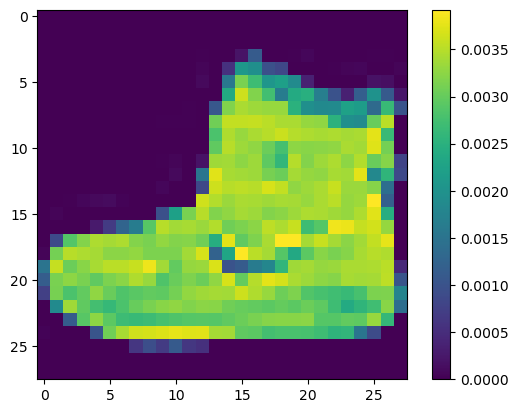

In [51]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [28]:
train_images=train_images/255.0
test_images=test_images/255.0

In [29]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer
    keras.layers.Dense(128,activation="relu"), #hidden layer have 128 neuron
    keras.layers.Dense(10,activation="softmax") #output layer have 10 output because have 10 class softmax help us about neurons are 0 or 1 
])


model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [43]:
model.fit(train_images,train_labels,epochs=1) #model fitting

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.8949 - loss: 0.2951


In [44]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=1)
print("Test accuracy:",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.8737 - loss: 0.3563
Test accuracy: 0.8719000220298767


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
Ankle Boot


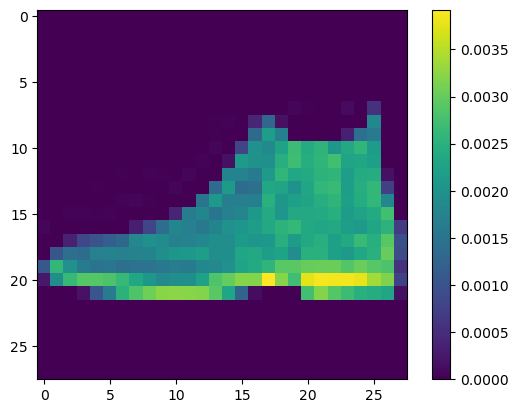

In [54]:
prediction=model.predict(test_images)
print(class_names[np.argmax(prediction[0])])
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number:  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


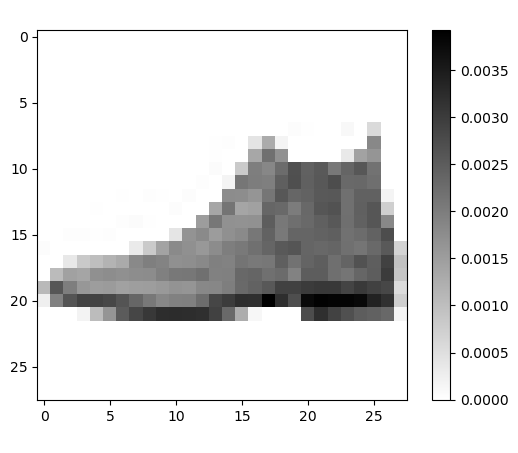

In [57]:
COLOR="white"
plt.rcParams["text.color"] = COLOR
plt.rcParams["axes.labelcolor"]=COLOR

def predict(model,image,correct_label):
    class_names=["T-shirt","Trousers","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]
    prediction=model.predict(np.array([image]))
    predicted_class=class_names[np.argmax(prediction)]
    
    show_image(image,class_names[correct_label], predicted_class)


def show_image(img,label,guess):
    plt.figure()
    plt.imshow(img,cmap=plt.cm.binary)
    plt.title("Expected:"+label)
    plt.xlabel("Guess: " +guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()

def get_number():
    while True:
        num =input("Pick a number: ")
        if num.isdigit():
            num=int(num)
            if 0 <= num <= 1000:
                return int(num)
        else:
            print("Try again...")
num=get_number()
image=test_images[num]
label=test_labels[num]
predict(model,image,label)             